In [1]:
# Get datasets from Hugging Face (ref: https://huggingface.co/datasets/hate_speech_filipino)

from datasets import load_dataset

hate_speech_fil_train_ds = load_dataset('hate_speech_filipino', split='train')
hate_speech_fil_test_ds = load_dataset('hate_speech_filipino', split='test')
hate_speech_fil_validate_ds = load_dataset('hate_speech_filipino', split='validation')

Found cached dataset hate_speech_filipino (C:/Users/floss/.cache/huggingface/datasets/hate_speech_filipino/default/1.0.0/89001ab1965f35d6d74585e59f982bbdd09c82a645bf702f32a52ad95404dd83)
Found cached dataset hate_speech_filipino (C:/Users/floss/.cache/huggingface/datasets/hate_speech_filipino/default/1.0.0/89001ab1965f35d6d74585e59f982bbdd09c82a645bf702f32a52ad95404dd83)
Found cached dataset hate_speech_filipino (C:/Users/floss/.cache/huggingface/datasets/hate_speech_filipino/default/1.0.0/89001ab1965f35d6d74585e59f982bbdd09c82a645bf702f32a52ad95404dd83)


In [2]:
print(hate_speech_fil_train_ds.shape, hate_speech_fil_train_ds.features)
print(hate_speech_fil_test_ds.shape, hate_speech_fil_test_ds.features)
print(hate_speech_fil_validate_ds.shape, hate_speech_fil_validate_ds.features)

(10000, 2) {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['0', '1'], id=None)}
(10000, 2) {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['0', '1'], id=None)}
(4232, 2) {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['0', '1'], id=None)}


In [3]:
# Combine all the datasets into a single data frame.

import pandas as pd

hate_speech_fil_train_df = pd.DataFrame(hate_speech_fil_test_ds)
hate_speech_fil_test_df = pd.DataFrame(hate_speech_fil_train_ds)
hate_speech_fil_validate_df = pd.DataFrame(hate_speech_fil_validate_ds)

hate_speech_fil_df = pd.concat([hate_speech_fil_test_df, hate_speech_fil_train_df, hate_speech_fil_validate_df])

In [4]:
hate_speech_fil_train_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [5]:
hate_speech_fil_train_df.duplicated().sum()

248

In [6]:
hate_speech_fil_test_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [7]:
hate_speech_fil_test_df.duplicated().sum()

248

In [8]:
hate_speech_fil_validate_df

,text,label
0,Escudero denies betraying Poe after meeting wi...,0
1,Hndi ko makita yung sa one more chance saka ka...,1
2,Mar Roxas is now addressing the crowd gathered...,0
3,@ImYourBaeMax perfect! Para makaharap ni Duter...,0
4,#OnlyBinayPriority4Ps Wag nating hayaan na mal...,0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [9]:
hate_speech_fil_validate_df.duplicated().sum()

55

In [10]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [11]:
# Check for null values.

hate_speech_fil_df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
# Check for duplicates.

hate_speech_fil_df.duplicated().sum()

10356

In [13]:
# Show the duplicates.

hate_speech_fil_df[hate_speech_fil_df.duplicated()]


,text,label
452,#NogNogHambog,1
481,#OnlyBinayInMakatiSanKaPa,0
543,#OnlyBinayInMakatiSanKaPa,0
576,#OnlyBinayInMakatiSanKaPa,0
598,#OnlyBinayUNAsaIlocos,0
...,...,...
4013,#OnlyBinayUNAsaIlocos,0
4029,#onlybinay,0
4042,#PHvote,0
4158,#PiliPinasDebates2016,1


In [14]:
# Remove the duplicates.

hate_speech_fil_df = hate_speech_fil_df.drop_duplicates()

hate_speech_fil_df.duplicated().sum()

0

In [15]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


Creating a Train and Test sets

In [16]:
X = hate_speech_fil_df['text']
y = hate_speech_fil_df['label']

print(X.shape)
print(y.shape)

(13876,)
(13876,)


In [17]:
# Split X and y into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10407,)
(3469,)
(10407,)
(3469,)


Vectorizing the dataset

In [18]:
# Instantiate the CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [19]:
# Learn the training data vocabulary, then use it to create a document-term matrix.

vect.fit(X_train)

CountVectorizer()

In [20]:
# Examine the fitted vocabulary.

feature_names = vect.get_feature_names_out()
print(feature_names)
print('len:', len(feature_names))
pd.DataFrame(feature_names)


['00' '000' '000php' ... 'zzz' 'zzzzzzzzz' 'ña']
len: 19262


,0
0,00
1,000
2,000php
3,002
4,00am
...,...
19257,zz
19258,zzdq5zzi
19259,zzz
19260,zzzzzzzzz


In [21]:
# Transform the training data into a document-term matrix.

# X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)

In [22]:
# Examine the document-term matrix.

X_train_dtm

<10407x19262 sparse matrix of type '<class 'numpy.int64'>'
	with 139544 stored elements in Compressed Sparse Row format>

In [23]:
# Transform the testing data (using fitted vocabulary) into a document-term matrix.

X_test_dtm = vect.transform(X_test)
X_test_dtm

<3469x19262 sparse matrix of type '<class 'numpy.int64'>'
	with 42227 stored elements in Compressed Sparse Row format>

Building the Evaluate the model

In [24]:
# Import and instantiate a Multinomial Naive Bayes model.

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [25]:
# Train the model using X_train_dtm and the fit() method.

mnb.fit(X_train_dtm, y_train)

MultinomialNB()

In [26]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.

y_pred_class = mnb.predict(X_test_dtm)

In [27]:
# Calculate the accuracy of the predictions.

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.7114442202363793

array([[1261,  570],
       [ 431, 1207]], dtype=int64)

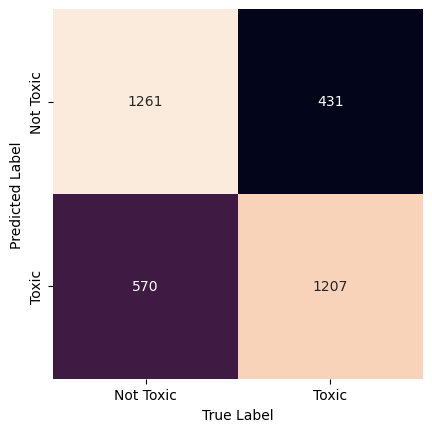

In [28]:
# Print the confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [29]:
# Print the classification report.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1831
           1       0.68      0.74      0.71      1638

    accuracy                           0.71      3469
   macro avg       0.71      0.71      0.71      3469
weighted avg       0.71      0.71      0.71      3469



In [30]:
# Show the predicted probabilities for the X_test_dtm.

y_pred_prob = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.79436007, 0.99998523, 0.99543761, ..., 0.99478151, 0.71138315,
       0.96289711])

In [31]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.

test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob': y_pred_prob})
test_results_df


,text,actual,predicted,prob
2131,"Kahit si Poe, wag lang si Duterte! Huhu",1,1,0.794360
567,Ang nakakatakot eh subrang desperado na ni Mar...,1,1,0.999985
8051,Realtalk: Nakaka-asar na si VP Binay. #ALDUBWi...,1,1,0.995438
3984,Grabe kayo kay binay ??????????,1,1,0.846186
6131,"As I have said many times, Mar Roxas doesn't h...",0,0,0.000020
...,...,...,...,...
2864,Kay Kuya Binay na lang nga message bilin ya. ??,0,1,0.531134
4169,Leading pa rin si Binay sa SWS survey! PUNYETA PO,1,1,0.925817
3825,Hakot Poe! Kahit sinisiraan mo si Duterte. Di ...,1,1,0.994782
35,@hannabitchi Binay pa. Hahaha,0,1,0.711383


In [32]:
vect_v2 = CountVectorizer(stop_words='english', ngram_range=(1, 15), max_df=0.7, min_df=1)

# Vectorize the data.
X_train_dtm_v2 = vect_v2.fit_transform(X_train)
X_test_dtm_v2 = vect_v2.transform(X_test)

# Fit the data to the model.
mnb.fit(X_train_dtm_v2, y_train)
y_pred_class_v2 = mnb.predict(X_test_dtm_v2)

# Check accuracy.
metrics.accuracy_score(y_test, y_pred_class_v2)


0.7310464110694724

Making a custom stop words that includes the Filipino language

In [33]:
# Making a custom stop words list that includes the Filipino language.

# Built-in English stop words.
english_stop_words = CountVectorizer(stop_words='english').get_stop_words()

# Generated by ChatGPT.
filipino_stop_words1 = [
    "ako", "akin", "ako'y", "amin", "aming", "ang", "ano", "anuman", "apat", "at", "atin", "ating",
    "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din", "dito", "doon",
    "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto", "habang", "hanggang", "hindi", "huwag", "iba",
    "ibaba", "ibabaw", "ibig", "ikaw", "ilagay", "ilalim", "ilan", "inyong", "isa", "isang", "ito", "iyo",
    "iyon", "iyong", "ka", "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya", "kanyang",
    "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kay", "kaya", "kaysa", "ko", "kung", "laban",
    "lahat", "lamang", "likod", "lima", "maaari", "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "mga",
    "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging", "nagkaroon", "nais", "nakita", "namin", "napaka",
    "narito", "nasaan", "ng", "nga", "ngayon", "ni", "nila", "nilang", "nito", "niya", "niyang", "noon",
    "o", "pag", "pala", "para", "pati", "pero", "pumunta", "pumupunta", "sa", "saan", "sabi", "sabihin",
    "sarili", "si", "sila", "sino", "siya", "tatlo", "tayo", "tulad", "tungkol", "una", "walang"
]

# From an open-source GitHub repo (ref: https://github.com/stopwords-iso/stopwords-tl).
filipino_stop_words2 = [
    'ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin', 'ang', 'aming', 'amin', 'ating',
    'ka', 'iyong', 'iyo', 'inyong', 'siya', 'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila',
    'kanila', 'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon', 'am', 'ay',
    'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon', 'gumawa', 'ginagawa', 'ginawa', 'paggawa',
    'ibig', 'dapat', 'maaari', 'marapat', 'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais',
    'niyang', 'nilang', 'niya', 'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni',
    'nasaan', 'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero', 'o', 'dahil',
    'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para', 'tungkol', 'laban', 'pagitan', 'panahon', 'bago',
    'pagkatapos', 'itaas', 'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli', 'pa',
    'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat', 'ilan', 'karamihan', 'iba', 'tulad',
    'lamang', 'pareho', 'kaya', 'kaysa', 'masyado', 'napaka', 'isa', 'bababa', 'kulang', 'marami', 'ngayon',
    'kailanman', 'sabi', 'nabanggit', 'din', 'kumuha', 'pumunta', 'pumupunta', 'ilagay', 'makita', 'nakita',
    'katulad', 'mahusay', 'likod', 'kahit', 'paraan', 'noon', 'gayunman', 'dalawa', 'tatlo', 'apat', 'lima',
    'una', 'pangalawa'
]

# Get the union of the two filipino stop words lists.
filipino_stop_words = list(set(filipino_stop_words1).union(set(filipino_stop_words2)))

# Get the union of the english and filipino stop words lists.
custom_stop_words = list(english_stop_words.union(filipino_stop_words))


Improve the model by hyperparameter tuning using GridSearchCV

In [42]:
# Hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with CountVectorizer and MultinomialNB.
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

# Create a dictionary of parameters to search.
params = {
    'cvec__stop_words': [custom_stop_words],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)],
    'cvec__min_df': [1, 2, 3, 4, 5],
    'cvec__max_df': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5],
    'mnb__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy', refit=True)

# Fit GridSearch to training data.
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


c:\Users\floss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\floss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\floss\anaconda3\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\floss\anaconda3\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\floss\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4,
                                          5],
                         'cvec__min_df': [1, 2, 3, 4, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4),
                                               (1, 5)],
                         'cvec__stop_words': [None, 'english',
                                              ['gayunman', 'pangalawa',
                                               'walang', 'kapwa', 'atin',
                                               'napaka', 'bababa', 'na'...
                                               'minsan', 'pagitan', ...],
                                              ['gayunman', 'pangalawa', 'more',
                                               'system', 'without', 'most',
                                               'napaka', 'bababa', 'nowhere',
                                               'na', 'palabas', 'per', 'kaya',
                                               'sometime', 'pag', 'therein',
                                               'until', 'sila', 'where', 'once',
                                               'against', 'least', 'ano', 'ni',
                                               'though', 'isa', 'pamamagitan',
                                               'out', 'who', 'pumupunta', ...]],
                         'mnb__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='accuracy', verbose=2)

In [43]:
gs.best_params_

{'cvec__max_df': 0.3,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': ['gayunman',
  'pangalawa',
  'more',
  'system',
  'without',
  'most',
  'napaka',
  'bababa',
  'nowhere',
  'na',
  'palabas',
  'per',
  'kaya',
  'sometime',
  'pag',
  'therein',
  'until',
  'sila',
  'where',
  'once',
  'against',
  'least',
  'ano',
  'ni',
  'though',
  'isa',
  'pamamagitan',
  'out',
  'who',
  'pumupunta',
  're',
  'ng',
  'which',
  'fire',
  'iyong',
  'the',
  'all',
  'makita',
  'towards',
  'ourselves',
  'in',
  'very',
  'was',
  'pumunta',
  "ako'y",
  'ibabaw',
  'these',
  'would',
  'keep',
  'pareho',
  'had',
  'maaaring',
  'our',
  'already',
  'former',
  'move',
  'ever',
  'become',
  'whom',
  'each',
  'when',
  'go',
  'not',
  'cant',
  'many',
  'sincere',
  'empty',
  'eight',
  'others',
  'one',
  'be',
  'paggawa',
  'within',
  'dapat',
  'anywhere',
  'afterwards',
  'and',
  'it',
  'amoungst',
  'never',
  'he',
  'again',
  'paba

In [85]:
# Build a new model using the best parameters.

vect_v3 = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 1), max_df=0.5, min_df=2)
mnb_v3 = MultinomialNB(alpha=0.1)

# Vectorize the data.
X_train_dtm_v3 = vect_v3.fit_transform(X_train)
X_test_dtm_v3 = vect_v3.transform(X_test)

# Fit the data to the model.
mnb_v3.fit(X_train_dtm_v3, y_train)
y_pred_class_v3 = mnb_v3.predict(X_test_dtm_v3)

# Check accuracy.
metrics.accuracy_score(y_test, y_pred_class_v3)

0.7431536465840299